- Index Number : 200363R 
- Name : R.M.S.Madhushan 
- Github Link : https://github.com/SadeepRathnayaka/EN3160_Assignment1

In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

*Question 01*

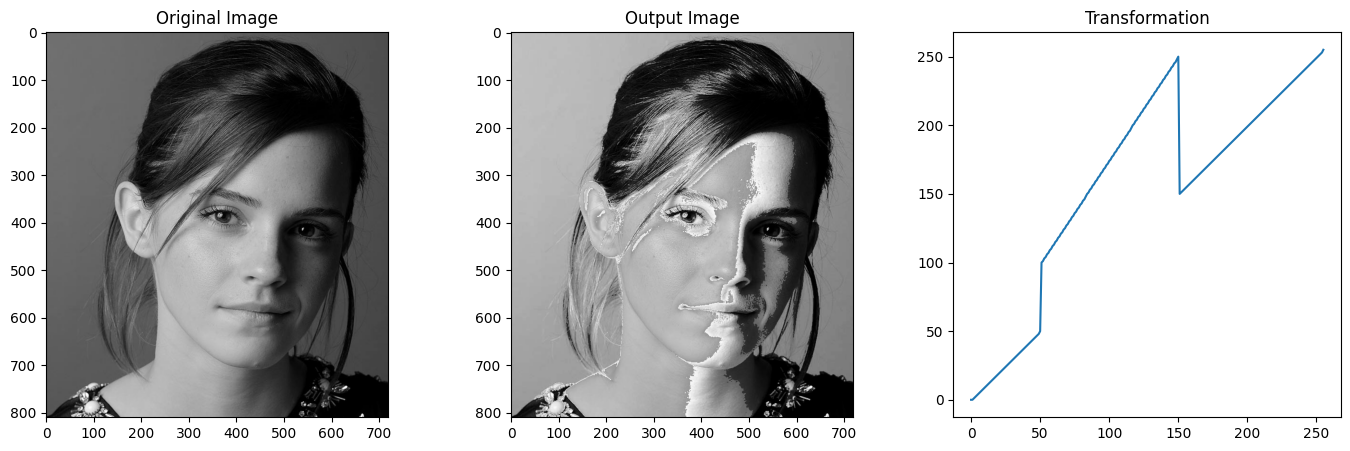

In [87]:
image1 = cv.imread('emma_new.jpg', cv.IMREAD_GRAYSCALE)
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

x = np.arange(0,256).astype(np.uint8)

coordinates = np.array([(0,0),(50,50),(50,100),(150,250),(150,150),(255,255)])
trans = np.array([0])

for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] )
    trans = np.concatenate((trans , line)).astype(np.uint8)

transformed = trans[image1]

fig, axes = plt.subplots(1,3, figsize=(17,5))

axes[0].imshow(image1), axes[0].set_title('Original Image')
axes[1].imshow(transformed), axes[1].set_title('Output Image')
axes[2].plot(x, trans ), axes[2].set_title('Transformation')

plt.show()


*Question 02*

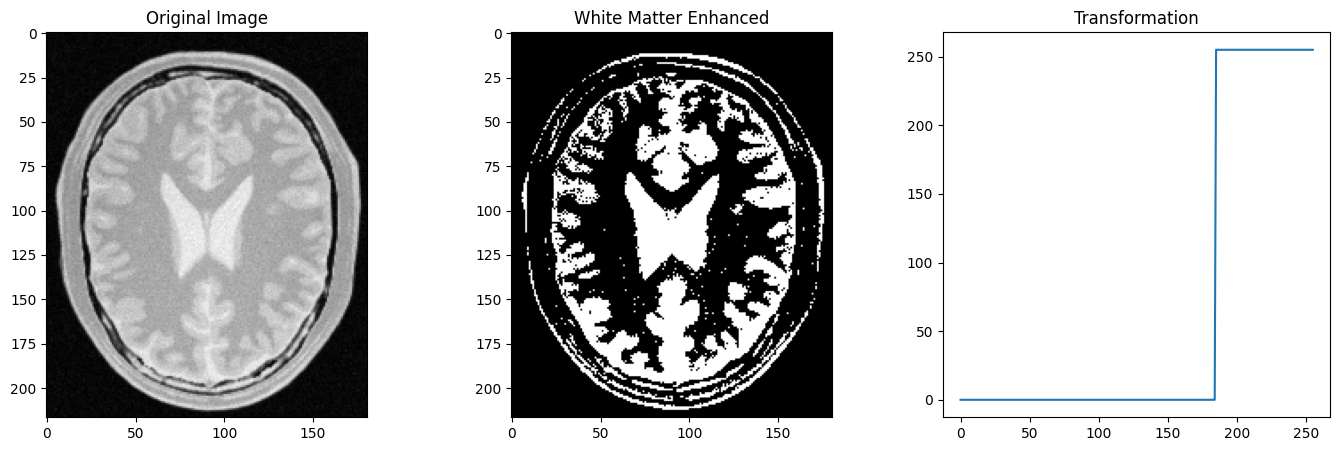

In [150]:
image2 = cv.imread('BrainProtonDensitySlice9.png')
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

x = np.arange(0,256).astype(np.uint8)

divert_point = 184
coordinates = np.array([(1,0),(divert_point,0),(divert_point+1,255),(255,255)])
trans = np.array([0])

for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] + 1)
    trans = np.concatenate((trans , line)).astype(np.uint8)

transformed = trans[image2]

fig, axes = plt.subplots(1,3, figsize=(17,5))

axes[0].imshow(image2), axes[0].set_title('Original Image')
axes[1].imshow(transformed), axes[1].set_title('White Matter Enhanced')
axes[2].plot(x, trans ), axes[2].set_title('Transformation')

plt.show()



Gray Matter Enhanced

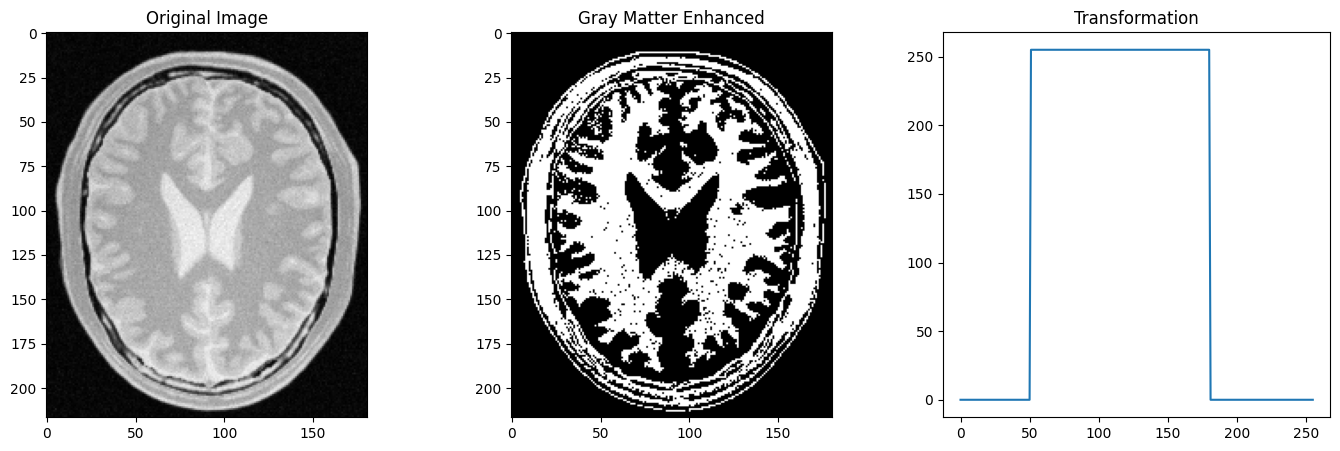

In [149]:
divert_point1 = 50
divert_point2 = 180

coordinates = np.array([(1,0),(divert_point1,0),
                        (divert_point1+1,255),(divert_point2,255),
                        (divert_point2+1,0),(255,0)])

trans = np.array([0])

for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] + 1)
    trans = np.concatenate((trans, line)).astype(np.uint8)

transformed = trans[image2]

fig, axes = plt.subplots(1,3, figsize=(17,5))

axes[0].imshow(image2), axes[0].set_title('Original Image')
axes[1].imshow(transformed), axes[1].set_title('Gray Matter Enhanced')
axes[2].plot(x, trans ), axes[2].set_title('Transformation')

plt.show()


*Question 03*

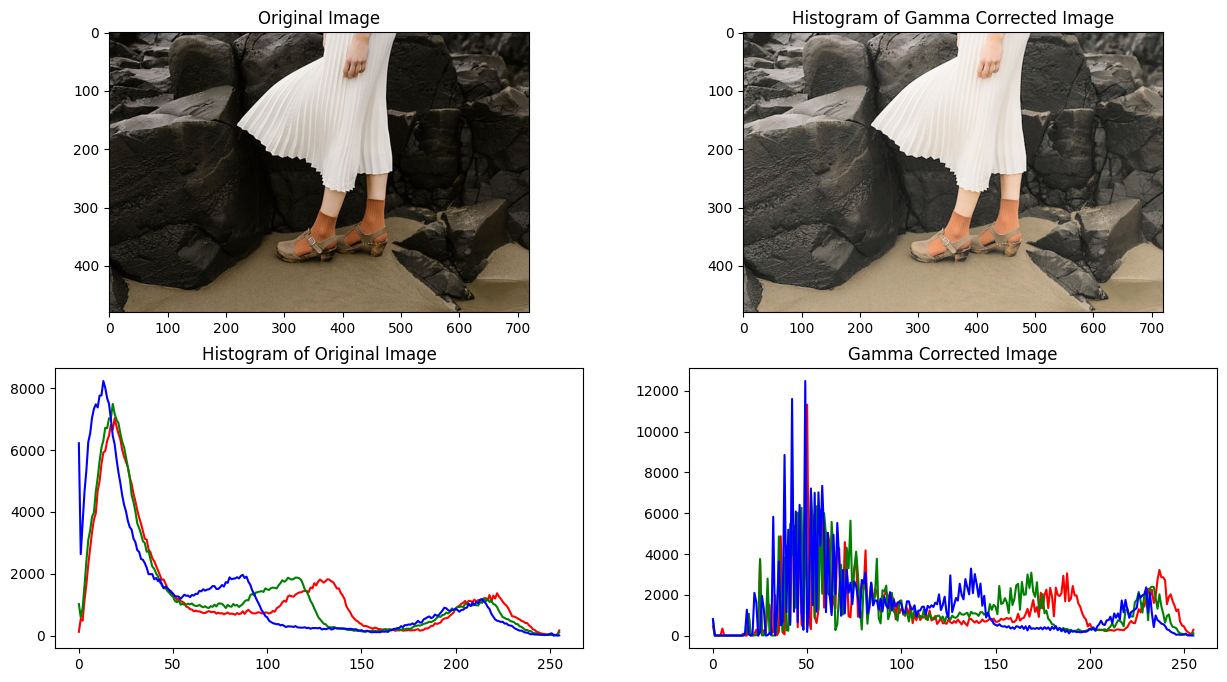

In [80]:
image3 = cv.imread('highlights_and_shadows.jpg')
image3_copy = image3.copy()
image3_copy = cv.cvtColor(image3_copy,cv.COLOR_BGR2RGB)
image3 = cv.cvtColor(image3, cv.COLOR_BGR2LAB)
l_img , a_img , b_img = cv.split(image3)

gamma = 0.5

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype(np.uint8)
img_gamma = cv.LUT(l_img, table)

final_image = cv.merge((img_gamma, a_img, b_img))
final_image = cv.cvtColor(final_image, cv.COLOR_LAB2RGB)

fig, axes = plt.subplots(2,2, figsize=(15,8))

axes[0, 0].imshow(image3_copy), axes[0, 0].set_title('Original Image')

color = ('r','g','b')
for i,c in enumerate(color) :
    hist_orig = cv.calcHist([image3_copy], [i], None, [256],[0,256])
    axes[1, 0].plot(hist_orig, color = c), axes[1, 0].set_title('Histogram of Original Image')

    hist_gamma = cv.calcHist([final_image],[i],None,[256], [0,256])
    axes[1, 1].plot(hist_gamma, color = c), axes[0, 1].set_title('Histogram of Gamma Corrected Image')

axes[0, 1].imshow(final_image), axes[1, 1].set_title('Gamma Corrected Image')


plt.show()


*Discussion*

- L channel : This plane represent the Lightness / Brightness of image.When adding gamma correction with gamma=0.5,
  it will increase the brightness of the L plane and the final output image.

- A plane : This plane represent the color from green to red. Negative value correspond to green while positive values
  correspond to red.

- B plane : This plane represent the color from blue to yellow. Negative value correspond to blue while positive values correspond to yellow.

*Question 04*

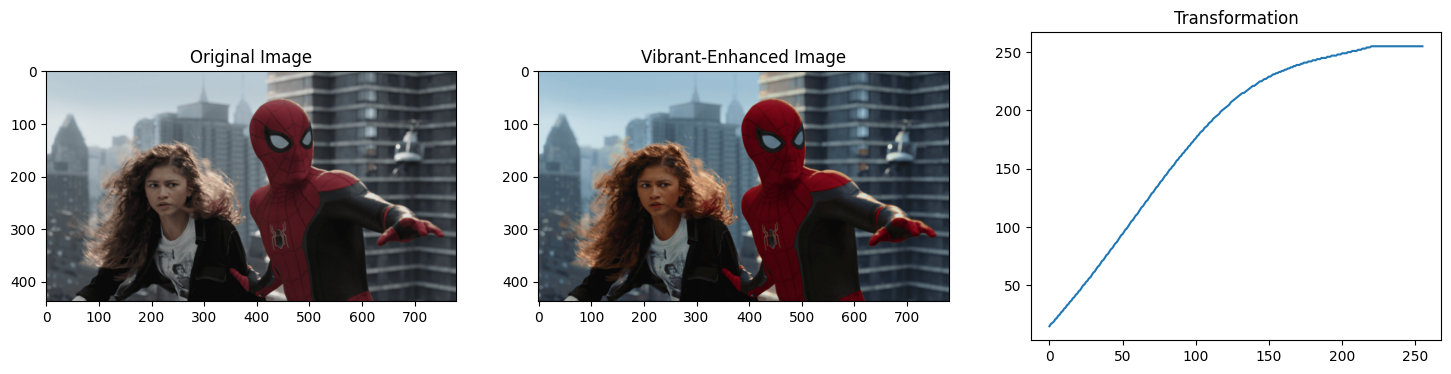

In [107]:
image4 = cv.imread('spider.png')
image4_copy = image4.copy()
image4_copy = cv.cvtColor(image4_copy, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image4, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_image)

a = 0.65
alpha = 70

x = np.arange(0,256,1).astype(np.uint8)

table = np.array([min(255, (x + (a * 128) * np.exp(-((x - 128) ** 2) / (2 * alpha ** 2)))) for x in np.arange(0, 256)]).astype('uint8')
sat_update = cv.LUT(saturation, table)

merge_img = cv.merge((hue, sat_update , value))
merge_img = cv.cvtColor(merge_img, cv.COLOR_HSV2RGB)

fig, axes = plt.subplots(1,3, figsize=(18,4))

axes[0].imshow(image4_copy), axes[0].set_title('Original Image')
axes[1].imshow(merge_img), axes[1].set_title('Vibrant-Enhanced Image')
axes[2].plot(x, table), axes[2].set_title('Transformation')

plt.show()

*Question 05*

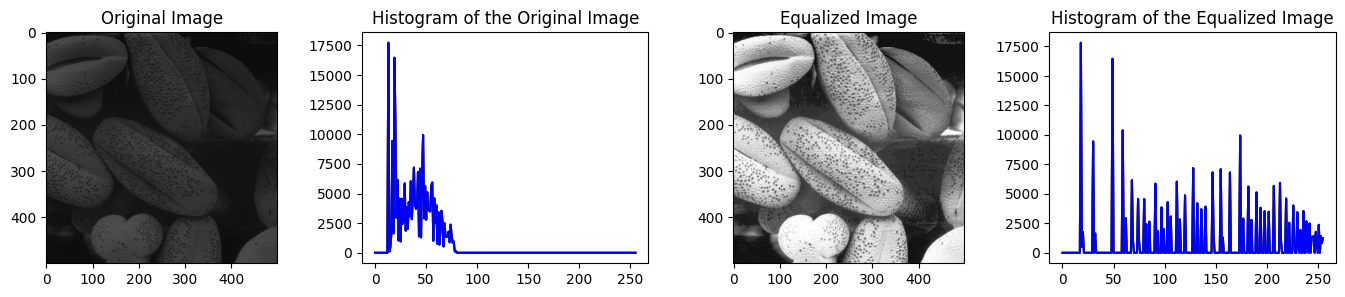

In [99]:
image5 = cv.imread('shells.tif')
image5 = cv.cvtColor(image5, cv.COLOR_BGR2RGB)

height, width = image5.shape[0], image5.shape[1]
r_plane, g_plane, b_plane = cv.split(image5)

def intensity_count(plane) :
    
    count_list = np.zeros(256).astype(np.uint16)
    for i in range(height) :
        for j in range(width) :
            count_list[plane[i][j]] += 1
        
    return count_list

def histogram_eq(plane, intensity_count) :

    equalized_intensities = np.zeros(256).astype(np.uint16)
    count = 0

    for i in range(len(intensity_count)) :
        count += intensity_count[i] 
        new_val = (255/(height*width)) * count
        new_val = round(new_val)
        equalized_intensities[i] = new_val

    for h in range(height) :
        for w in range(width) :
            plane[h][w] = equalized_intensities[plane[h][w]]

    return plane

r_plane_count = intensity_count(r_plane)
eq_r_plane = histogram_eq(r_plane, r_plane_count)

g_plane_count = intensity_count(g_plane)
eq_g_plane = histogram_eq(g_plane, g_plane_count)

b_plane_count = intensity_count(b_plane)
eq_b_plane = histogram_eq(b_plane, b_plane_count)

new_image = cv.merge((eq_r_plane,eq_g_plane,eq_b_plane))

fig, axes = plt.subplots(1,4, figsize=(17,3))

color = ('r','g','b')
for i,c in enumerate(color) :
    hist_orig = cv.calcHist([image5], [i], None, [256],[0,256])
    axes[1].plot(hist_orig, color = c) , axes[1].set_title('Histogram of the Original Image')

    hist_eq = cv.calcHist([new_image], [i], None, [256],[0,256])
    axes[3].plot(hist_eq, color = c) , axes[3].set_title('Histogram of the Equalized Image')


axes[0].imshow(image5), axes[0].set_title('Original Image')
axes[2].imshow(new_image),axes[2].set_title('Equalized Image')
plt.show()

*Question 06*

- *Part a,b,c*

In [71]:
image6 = cv.imread('jeniffer.jpg')
image6 = cv.cvtColor(image6, cv.COLOR_BGR2RGB)
image6_hsv = cv.cvtColor(image6, cv.COLOR_RGB2HSV)

h_plane, s_plane, v_plane = cv.split(image6_hsv)

th_val, binary_image = cv.threshold(s_plane, 11, 255, cv.THRESH_BINARY)
result = cv.bitwise_and(image6, image6, mask = binary_image)


- *Part d*

In [72]:
hist, bins = np.histogram(result.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

- *Part e*

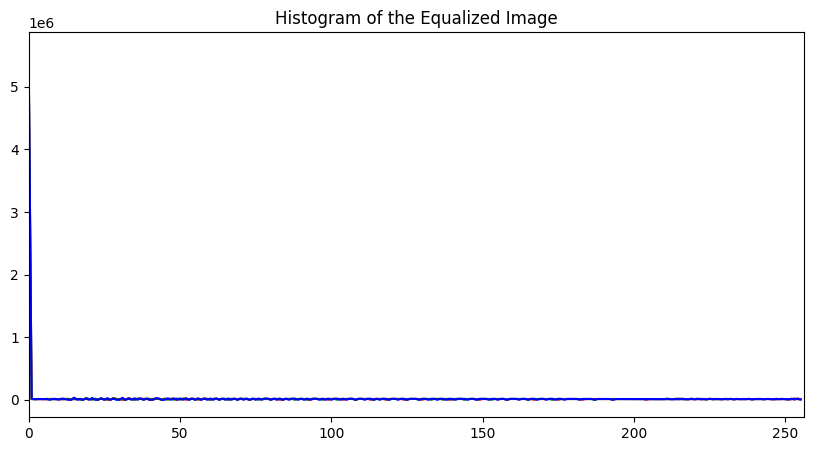

In [74]:
result_r , result_g, result_b = cv.split(result)
equ_r = cv.equalizeHist(result_r)
equ_g = cv.equalizeHist(result_g)
equ_b = cv.equalizeHist(result_b)

plt.figure(figsize=(10, 5))

hist_r, bins_r = np.histogram(equ_r.ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(equ_g.ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(equ_b.ravel(), 256, [0, 256])

plt.plot(hist_r, color='r', label='R')
plt.plot(hist_g, color='g', label='G')
plt.plot(hist_b, color='b', label='B')


plt.xlim([0,256])
plt.title('Histogram of the Equalized Image')
plt.show()

- *Part f*

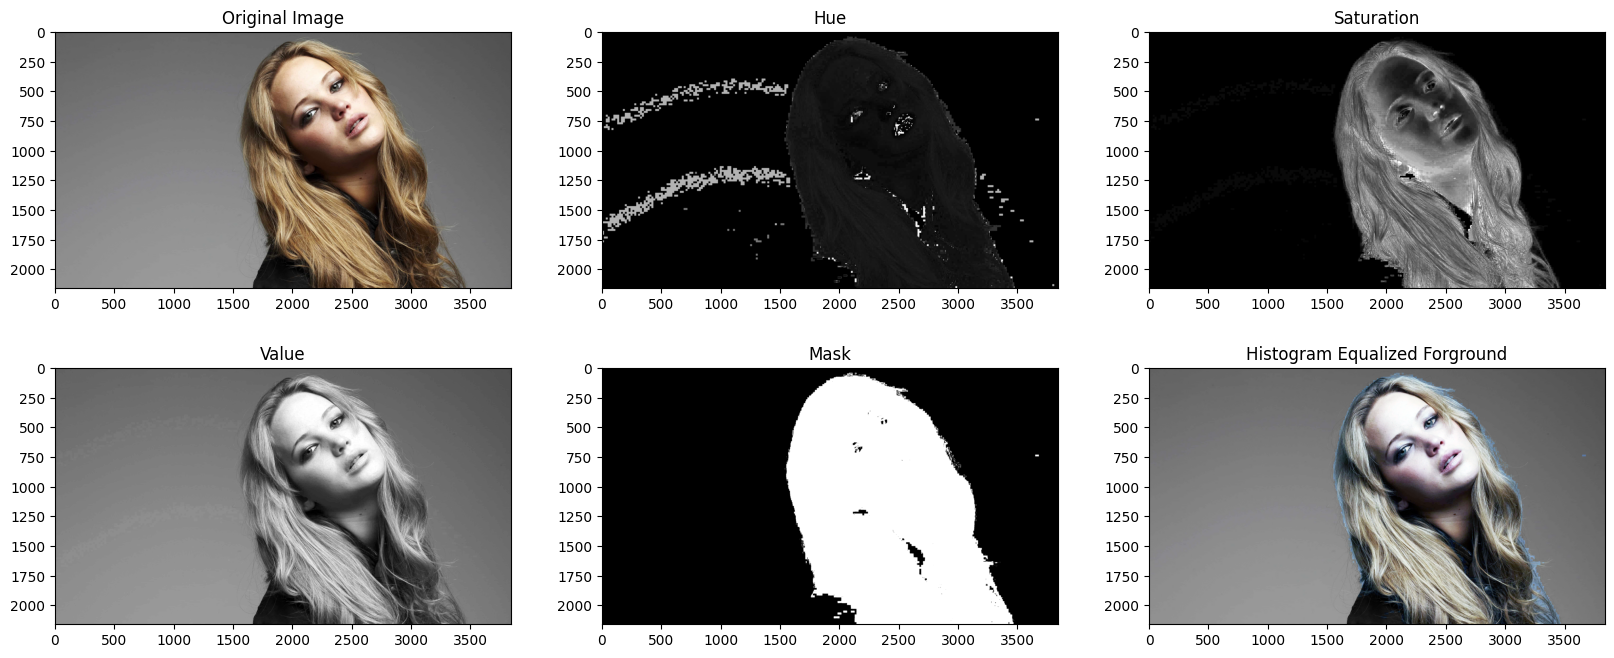

In [75]:
equalized_result = cv.merge((equ_r, equ_g, equ_b))
backgnd_mask = cv.bitwise_not(binary_image)
backgnd = cv.bitwise_and(image6, image6, mask = backgnd_mask)

final = cv.add(equalized_result, backgnd)

fig, axes = plt.subplots(2,3, figsize=(20,8))

axes[0,0].imshow(image6, cmap = 'gray'), axes[0,0].set_title('Original Image')
axes[0,1].imshow(h_plane, cmap = 'gray'), axes[0,1].set_title('Hue')
axes[0,2].imshow(s_plane, cmap = 'gray'), axes[0,2].set_title('Saturation')
axes[1,0].imshow(v_plane, cmap = 'gray'), axes[1,0].set_title('Value')
axes[1,1].imshow(binary_image, cmap = 'gray'), axes[1,1].set_title('Mask')
axes[1,2].imshow(final, cmap = 'gray'), axes[1,2].set_title('Histogram Equalized Forground')

plt.show()

*Question 07*

- *Part 01*

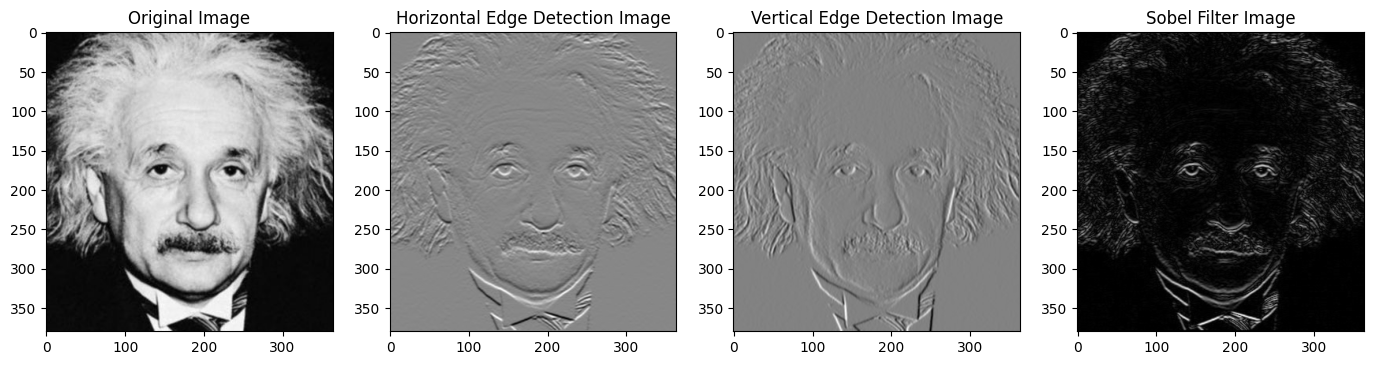

In [55]:
image7 = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

vertical_sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
horizontel_sobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)

img_horizontal = cv.filter2D(image7, -1, vertical_sobel)
img_vertical = cv.filter2D(image7, -1, horizontel_sobel)
final_image = np.sqrt(img_horizontal**2, img_vertical**2)

fig, axes = plt.subplots(1,4, figsize=(17,10))

axes[0].imshow(image7, cmap = 'gray'), axes[0].set_title('Original Image')
axes[1].imshow(img_horizontal, cmap = 'gray'), axes[1].set_title('Horizontal Edge Detection Image')
axes[2].imshow(img_vertical, cmap = 'gray'), axes[2].set_title('Vertical Edge Detection Image')
axes[3].imshow(final_image, cmap = 'gray'), axes[3].set_title('Sobel Filter Image')

plt.show()



- *Part 02*

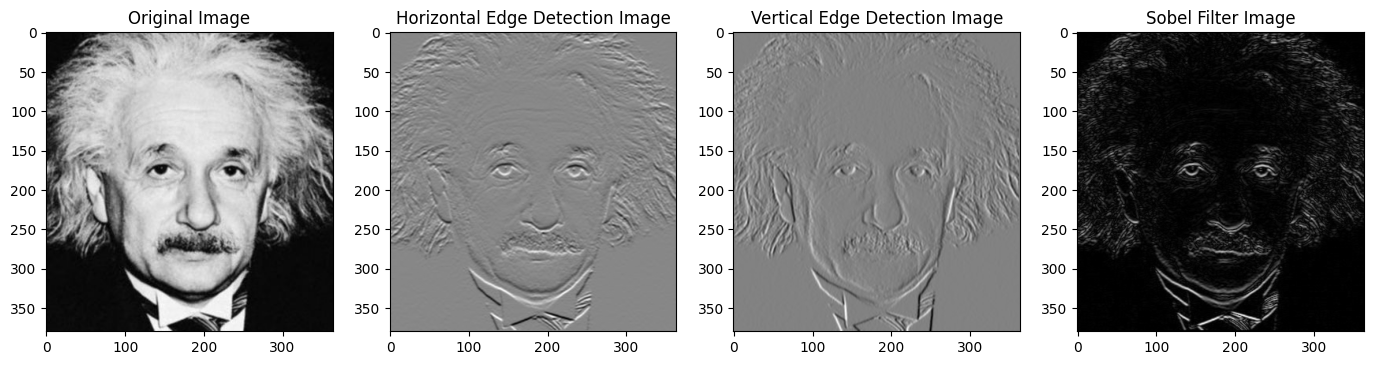

In [56]:
def sobel_fiter(image, kernel):

    h_im, w_im = image.shape[0] , image.shape[1]
    h_ke, w_ke = kernel.shape[0] , kernel.shape[1]
    h_ke_half, w_ke_half = h_ke // 2, w_ke // 2 

    result_h=np.zeros(image.shape,dtype=np.float32)
    image = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)   
    
    for i in range(h_ke, h_im - h_ke):
        for j in range(w_ke, w_im - w_ke):

            #  indentify the image window to get the 2D convolution with kernal
            image_window = image[i - h_ke_half : i + h_ke_half + 1, j - w_ke_half : j + w_ke_half + 1]  

            # covnolution 
            result_h[i, j] = np.sum(image_window * kernel)
    
    result_h = (result_h - np.min(result_h)) / (np.max(result_h) - np.min(result_h)) * 255
    
    return result_h

img_h = sobel_fiter(image7, vertical_sobel)
img_v = sobel_fiter(image7, horizontel_sobel)
final_image = np.sqrt(img_horizontal**2, img_vertical**2)

fig, axes = plt.subplots(1,4, figsize=(17,10))

axes[0].imshow(image7, cmap = 'gray'), axes[0].set_title('Original Image')
axes[1].imshow(img_horizontal, cmap = 'gray'), axes[1].set_title('Horizontal Edge Detection Image')
axes[2].imshow(img_vertical, cmap = 'gray'), axes[2].set_title('Vertical Edge Detection Image')
axes[3].imshow(final_image, cmap = 'gray'), axes[3].set_title('Sobel Filter Image')

plt.show()


*_Part C_*

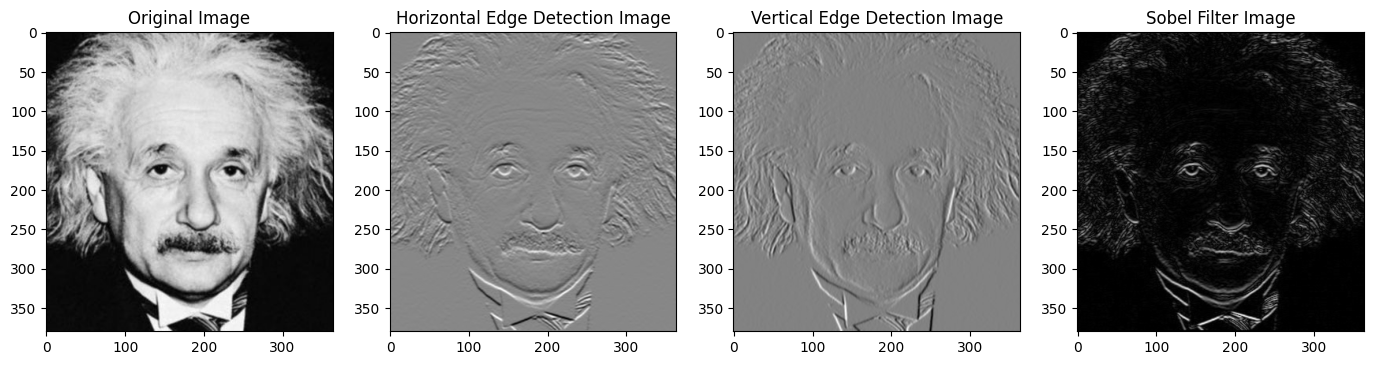

In [63]:
kernal_vertical  = np.array([-1,0,1],dtype=np.float32)
kernal_horizontal  = np.array([1,2,1],dtype=np.float32)

img_vertical = cv.sepFilter2D(image7, -1, kernal_vertical, kernal_horizontal)
img_horizontal = cv.sepFilter2D(image7, -1, kernal_horizontal, kernal_vertical)
final_image = np.sqrt(img_horizontal**2, img_vertical**2)

fig, axes = plt.subplots(1,4, figsize=(17,10))

axes[0].imshow(image7, cmap = 'gray'), axes[0].set_title('Original Image')
axes[1].imshow(img_horizontal, cmap = 'gray'), axes[1].set_title('Horizontal Edge Detection Image')
axes[2].imshow(img_vertical, cmap = 'gray'), axes[2].set_title('Vertical Edge Detection Image')
axes[3].imshow(final_image, cmap = 'gray'), axes[3].set_title('Sobel Filter Image')

plt.show()


*Question 08*

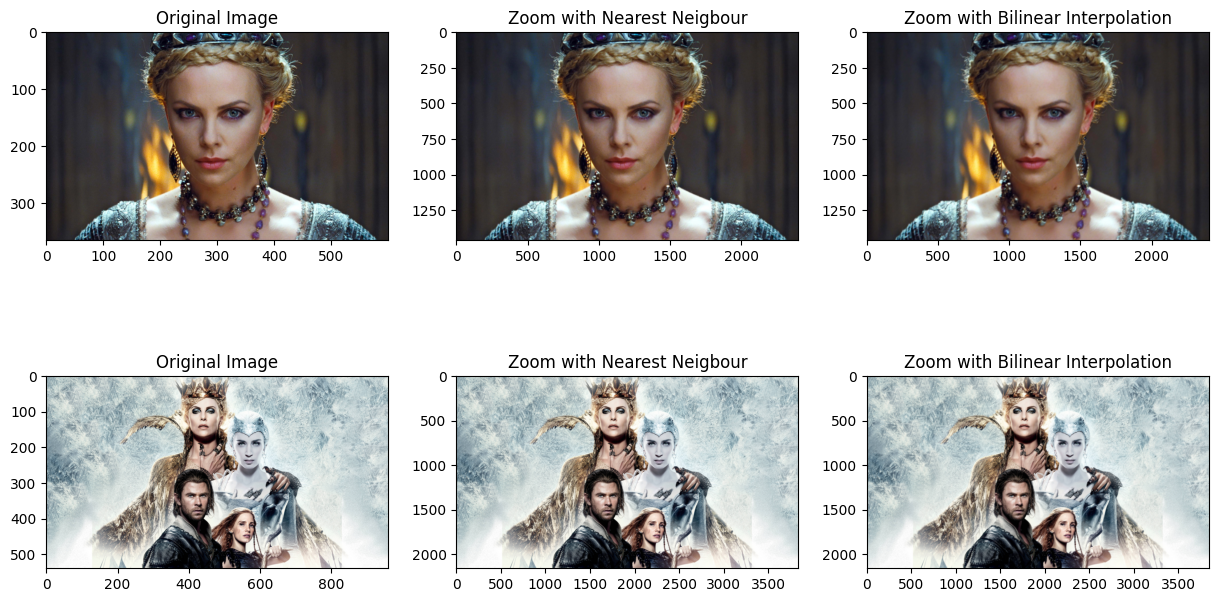

In [103]:
def zoom(image, scale, method) :
    h_image , w_image , channels = image.shape
    h_zoomed = h_image*scale
    w_zoomed = w_image*scale
    zoomed_image = np.zeros((h_zoomed, w_zoomed, channels), dtype = np.float32)

    if method == 'nearest neighbour' : 
        for i in range(h_zoomed) :
            for j in range(w_zoomed) :
                zoomed_image[i,j] = image[i // scale, j // scale]

    if method == 'bilinear interpolation' :
        for i in range(h_zoomed) :
            for j in range(w_zoomed) :
                
                x_image , y_image = (i / scale) , (j / scale )
                x1 , y1 = int(x_image) , int(y_image)
                x2 , y2 = x1+1, y1+1

                if x2 >= h_image : x2 = x1 
                if y2 >= w_image : y2 = y1

                dx = x_image - x1
                dy = y_image - y1

                w1 = (1 - dx) * (1 - dy)   # higher weight if the current point is closer to (x1,y1)
                w2 = dx * (1 - dy)
                w3 = (1 - dx) * dy
                w4 = dx * dy

                zoomed_image[i,j] = w1*image[x1,y1] + w2*image[x1,y2] + w3*image[x2,y1] + w4*image[x2,y2]


    return zoomed_image.astype(np.uint8)

image8_1 = cv.imread('zooming/im03small.png')
image8_1 = cv.cvtColor(image8_1, cv.COLOR_BGR2RGB)
zoomed_nn1 = zoom(image8_1, 4, 'nearest neighbour')
zoomed_bi1 = zoom(image8_1, 4, 'bilinear interpolation')

image8_2 = cv.imread('zooming/im04small.png')
image8_2 = cv.cvtColor(image8_2, cv.COLOR_BGR2RGB)
zoomed_nn2 = zoom(image8_2, 4, 'nearest neighbour')
zoomed_bi2 = zoom(image8_2, 4, 'bilinear interpolation')

fig, axes = plt.subplots(2,3, figsize=(15,8))

axes[0,0].imshow(image8_1) , axes[0,0].set_title('Original Image')
axes[0,1].imshow(zoomed_nn1) , axes[0,1].set_title('Zoom with Nearest Neigbour')
axes[0,2].imshow(zoomed_bi1) , axes[0,2].set_title('Zoom with Bilinear Interpolation')

axes[1,0].imshow(image8_2) , axes[1,0].set_title('Original Image')
axes[1,1].imshow(zoomed_nn2) , axes[1,1].set_title('Zoom with Nearest Neigbour')
axes[1,2].imshow(zoomed_bi2) , axes[1,2].set_title('Zoom with Bilinear Interpolation')

plt.show()


*Question 08 algorithm testing*

In [40]:
# Test for image01
zoomed_image = cv.imread('zooming/im01.png')

resized = cv.resize(image8, (1920, 1080), interpolation=cv.INTER_LINEAR)

squared_diff1 = np.sum(np.square(zoomed_image - zoomed_nn)) # zoomed by nearest negihbour
squared_diff2 = np.sum(np.square(zoomed_image - zoomed_bi)) # zoomed by bilinear interpolation
squared_diff3 = np.sum(np.square(zoomed_image - resized))   # zoomed by resize function
print('Squared Difference of zoomed image by Nearest Neighbour : ', squared_diff1)
print('Squared Difference of zoomed image by the resize Function : ', squared_diff2)
print('Squared Difference of zoomed image by the resize Function : ', squared_diff2)

Squared Difference of zoomed image by Nearest Neighbour :  522633462
Squared Difference of zoomed image by the Bilinear interpolation :  543747100
Squared Difference of zoomed image by the resize Function :  522553013


*Question 09*

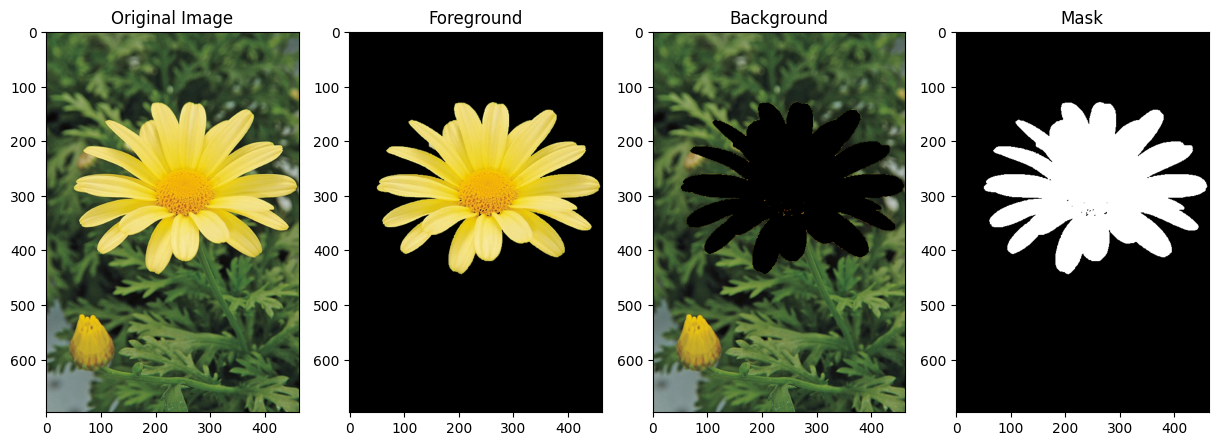

In [56]:
image9 = cv.imread('flower.png')
image9 = cv.cvtColor(image9, cv.COLOR_BGR2RGB)
h, w, _ = image9.shape
mask = np.zeros((h, w), dtype = np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rectangle = (0,0,h,w)

mask, bg_model, fg_model = cv.grabCut(image9, mask, rectangle, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
new_mask = np.where((mask == 0) | (mask == 2), 0, 1).astype(np.uint8)  # background-black and foreground white

foreground = image9 * new_mask[:, :, np.newaxis]
background = image9 * (1 - new_mask[:, :, np.newaxis])

fig, axes = plt.subplots(1,4,figsize=(15,10))

axes[0].imshow(image9), axes[0].set_title('Original Image')
axes[1].imshow(foreground), axes[1].set_title('Foreground')
axes[2].imshow(background), axes[2].set_title('Background')
axes[3].imshow(new_mask, cmap = 'gray'), axes[3].set_title('Mask')

plt.show()


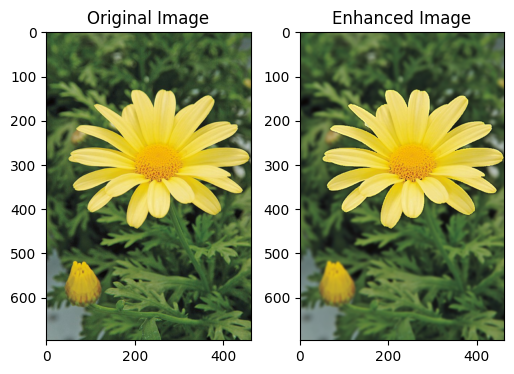

In [102]:
blur_bg = cv.GaussianBlur(background, (11,11), 0,0)
final_image = cv.add(foreground, blur_bg)

fig, axes = plt.subplots(1,2,figsize=(6,4))

axes[0].imshow(image9) , axes[0].set_title('Original Image')
axes[1].imshow(final_image) , axes[1].set_title('Enhanced Image')

plt.show()

*Q9 Part C*

- When background is blurred, it will reduce the contrast and details at the edge where the background and foreground
  get separated. Therefore, there can be some deformations around the edge and it could result some dark appearences
  around the edge of the foreground.  
- When Grabcut segmentation is used to segment the foreground and background, it may missclassified some pixel values 
  around the edge between the foreground and background. Therefore, there could be some dark appearence closer to the
  edge of the foreground. 